# Boston Housing Price Prediction Analysis
## Linear VS Polynomial Regression

In [575]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Load and Inspect Data

In [455]:
# Load dataset
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [425]:
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [427]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Visualization

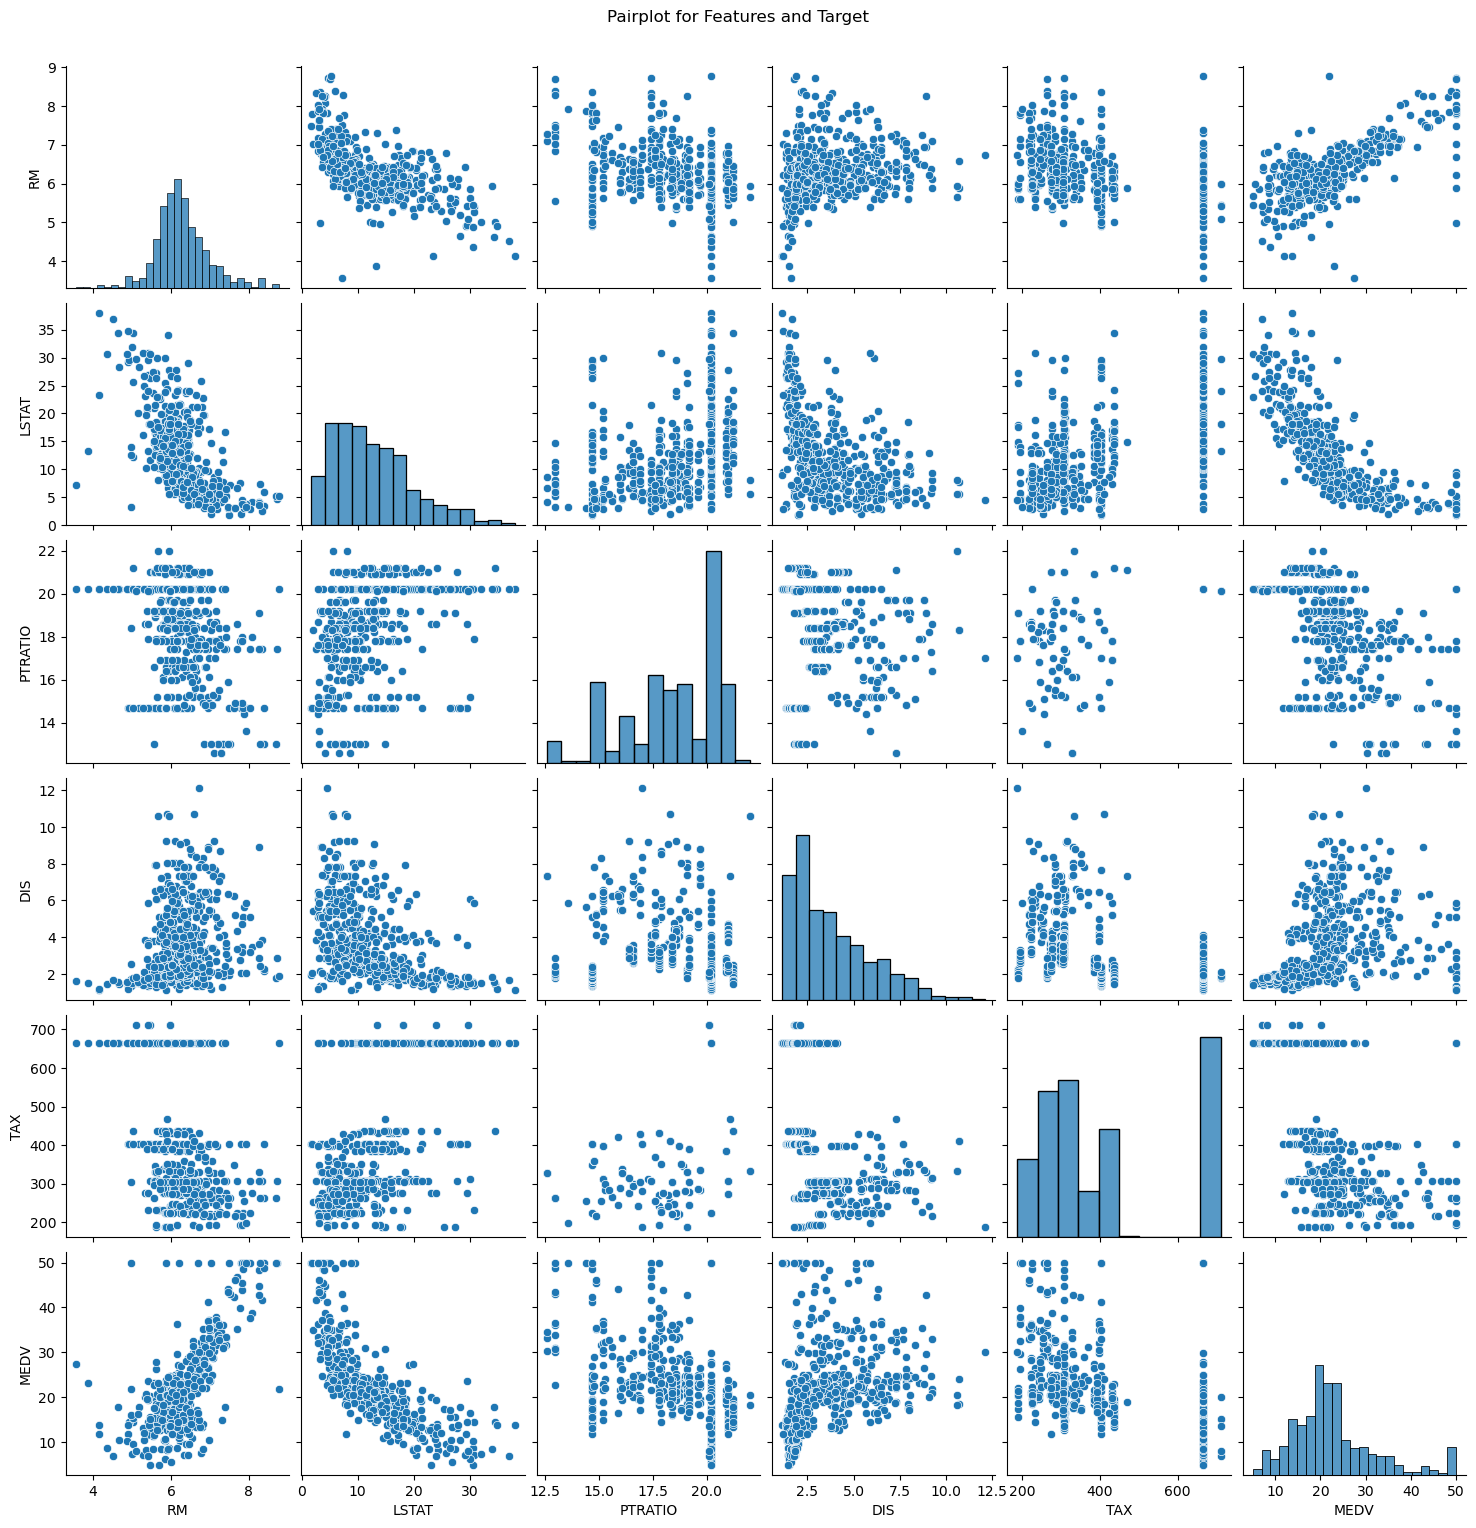

In [467]:
features = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'TAX']
df_viz = df[features + ['MEDV']]

# Pairplot
sns.pairplot(df_viz)
plt.suptitle("Pairplot for Features and Target", y=1.02)
plt.show()

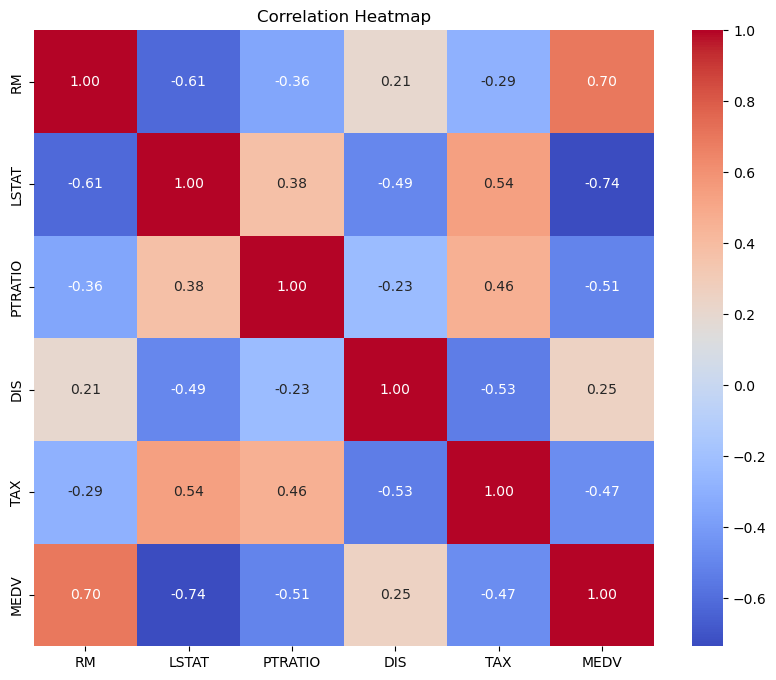

In [443]:
# Correlation Heatmap
corr = df_viz.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

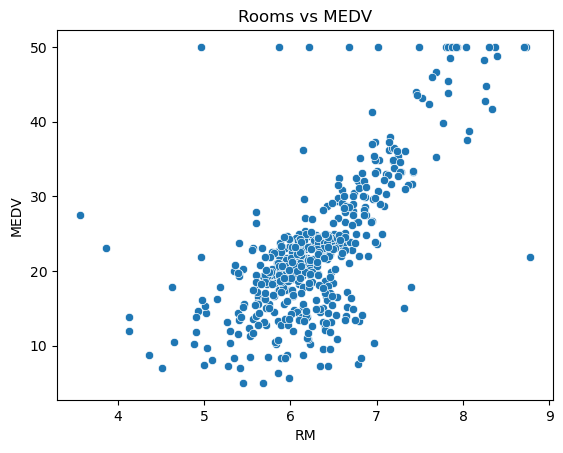

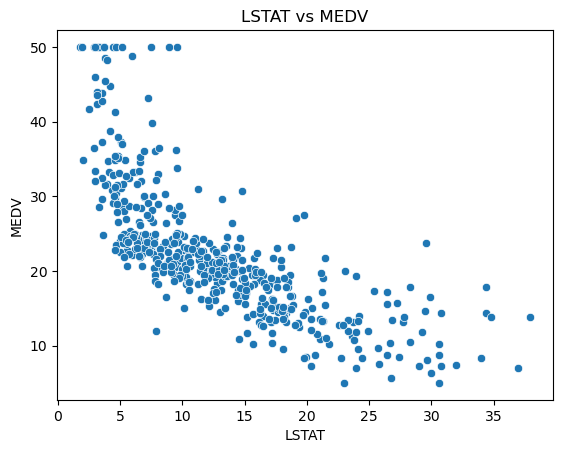

In [405]:
# Scatterplots
sns.scatterplot(data=df, x='RM', y='MEDV')
plt.title("Rooms vs MEDV")
plt.show()

sns.scatterplot(data=df, x='LSTAT', y='MEDV')
plt.title("LSTAT vs MEDV")
plt.show()

## Prepare Features and split Data

In [527]:
X = df[features]
y = df['MEDV']

In [529]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [523]:
# Replace missing values with column mean
imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

## Part 1: Linear Regression

In [525]:
# Train model linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [533]:
#Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MSE: 27.417379696005614
MAE: 3.26875064904469
R-squared: 0.6261289338357807


In [531]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 5.236160778280745


In [139]:
print ("Intercept:", model.intercept_)

Intercept: 22.37732046660127


In [559]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("Sorted Coefficients by Importance:")
print(coefficients_sorted[['Feature', 'Coefficient']])

Sorted Coefficients by Importance:
   Feature  Coefficient
0       RM     5.078211
2  PTRATIO    -0.755732
3      DIS    -0.684217
1    LSTAT    -0.572643
4      TAX    -0.007619


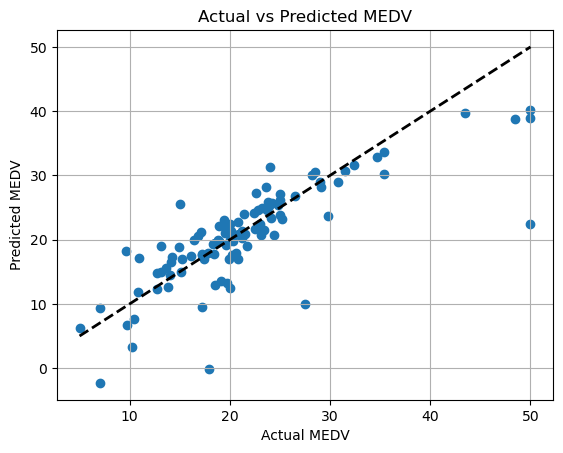

In [287]:
# Plot: Actual VS Prredicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV")
plt.grid(True)
plt.show()

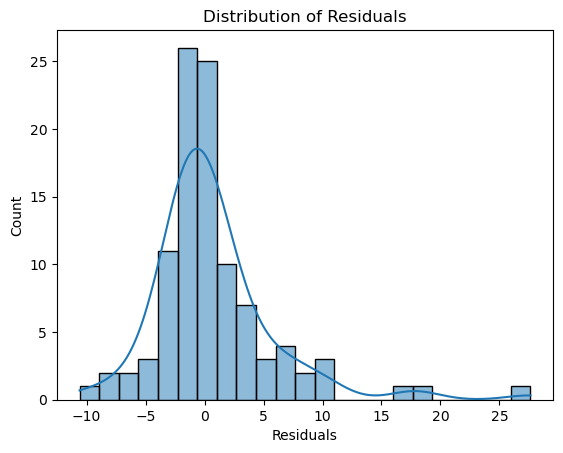

In [373]:
# Residuals plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

In [557]:
# Save model
joblib.dump(model, 'Linear_model.pkl')
print("Linear Regression Model Saved as 'linear_model.pk1'")

Linear Regression Model Saved as 'linear_model.pk1'


## Part 2: Polynomial Regression

In [545]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [549]:
# Create Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [551]:
# Train Polynomial Regression
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [553]:
# Predict
y_pred_poly = model_poly.predict(X_test_poly)

In [555]:
# Evalute
print("Polynomial Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("R-squared:", r2_score(y_test, y_pred_poly))


Polynomial Regression Results:
MSE: 14.596025620944225
MAE: 2.39643191202125
R-squared: 0.8009645078717095


In [332]:
# RMSE
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print("RMSE:", rmse_poly)

RMSE: 3.8204745282417765


In [322]:
print("Intercept:", model_poly.intercept_)
print("Number of Coefficients:", len(model_poly.coef_))

Intercept: -74.38503751723267
Number of Coefficients: 21


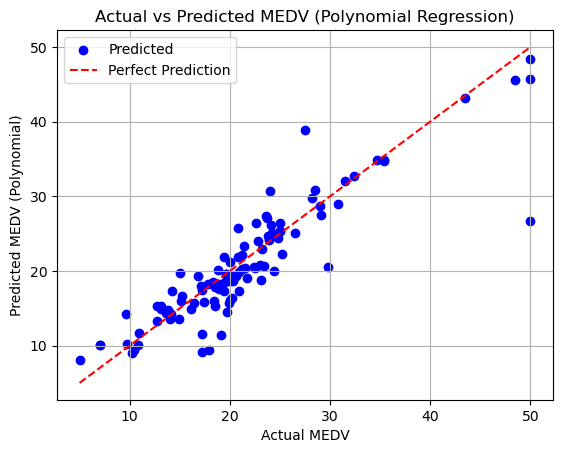

In [456]:
# Plot: Actual VS Prredicted
plt.scatter(y_test, y_pred_poly, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV (Polynomial)")
plt.title("Actual vs Predicted MEDV (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.show()

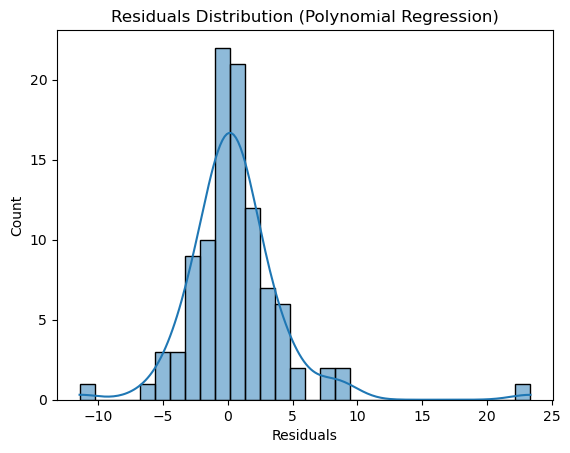

In [457]:
# Plot: Residuals
residuals_poly = y_test - y_pred_poly
sns.histplot(residuals_poly, kde=True)
plt.title("Residuals Distribution (Polynomial Regression)")
plt.xlabel("Residuals")
plt.show()

In [334]:
# Save model
joblib.dump(model_poly, 'polynomial.pkl')
print("Polynomial Regression Model Saved as 'polynomial_model.pk1'")

Polynomial Regression Model Saved as 'polynomial_model.pk1'


## Predict Price for a New House Example


In [573]:
# Example input
new_house = [[6.5, 12.0, 18.0, 3.5, 300]]

# Linear Prediction
print("Linear Prediction:", model.predict(new_house))

# Polynomial Prediction
new_house_poly = poly.transform(new_house)
print("Polynomial Prediction:", model_poly.predict(new_house_poly))

Linear Prediction: [25.2502051]
Polynomial Prediction: [24.23971227]


## Compare Linear vs Polynomial Predictions


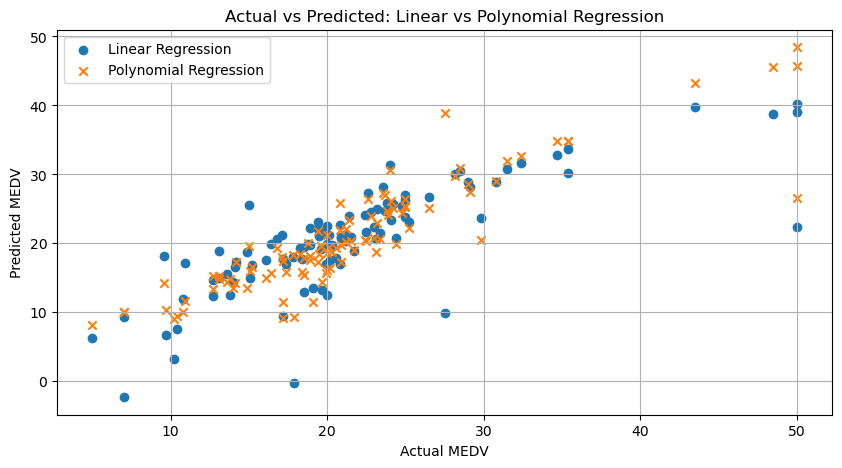

In [342]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, label="Linear Regression")
plt.scatter(y_test, y_pred_poly, label="Polynomial Regression", marker='x')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted: Linear vs Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
- In this project, we applied *Linear Regression* and *Polynomial Regression (degree = 2)* to the Boston Housing dataset.
- We evaluated both models using performance metrics: *MSE, **MAE, **R-squared, and **RMSE*.
- The results show that *Polynomial Regression* provides slightly better accuracy than Linear Regression because it can capture non-linear relationships between features.
- The comparison plot also illustrates that the polynomial model fits the actual values more closely in some areas.
- However, using higher-degree polynomials may lead to *overfitting*, so it's important to balance model complexity and performance.
- We also saved both trained models and demonstrated how to make predictions for a new house example.
  
> 🔑 *Summary:* Both models are useful and provide valuable insights. It’s always recommended to compare multiple models and choose the one that achieves the best trade-off between simplicity and accuracy.

---